In [10]:
import os
import numpy as np
import cv2
import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet169
from keras.applications.mobilenet import MobileNet

In [11]:
X_train = [] 
Y_train= [] 
image_size = 224
labels = ['Cryptosporidium cyst', 'Entamoeba histolytica', 'Giardia cyst']
        
for i in labels: 
    folderPath2 = os.path.join('/kaggle/input/protozoan-parasite-image-dataset-augmented/Train', i)
    for j in os.listdir(folderPath2):
        img = cv2.imread(os.path.join(folderPath2, j)) 
        img = cv2.resize(img, (image_size, image_size)) 
        X_train.append(img) 
        Y_train.append(i)
        
X_train = np.array(X_train) 
Y_Train = np.array(Y_train)

X_train, Y_train = shuffle(X_train, Y_train, random_state = 101)
X_train.shape

(6740, 224, 224, 3)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, random_state = 101, test_size = 0.1)

In [13]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i)) 
y_train = y_train_new
y_train = keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = keras.utils.to_categorical(y_test)

In [14]:
print('Train:', x_train.shape, y_train.shape)
print('Validation:', x_test.shape, y_test.shape)

Train: (6066, 224, 224, 3) (6066, 3)
Validation: (674, 224, 224, 3) (674, 3)


In [15]:
# VGG19 Neural Network
base_model = VGG19(input_shape = (224,224,3), include_top = False, weights = "imagenet")

In [16]:
model_one = Sequential()
model_one.add(base_model)
model_one.add(Dropout(0.5))
model_one.add(Flatten())
model_one.add(BatchNormalization())
model_one.add(Dense(512, kernel_initializer = 'he_uniform'))
model_one.add(BatchNormalization())
model_one.add(Activation('relu'))
model_one.add(Dense(3, activation = 'softmax'))

In [17]:
model_one.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_2 (Bat  (None, 25088)             100352    
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 batch_normalization_3 (Bat  (None, 512)               2048      
 chNormalization)                                     

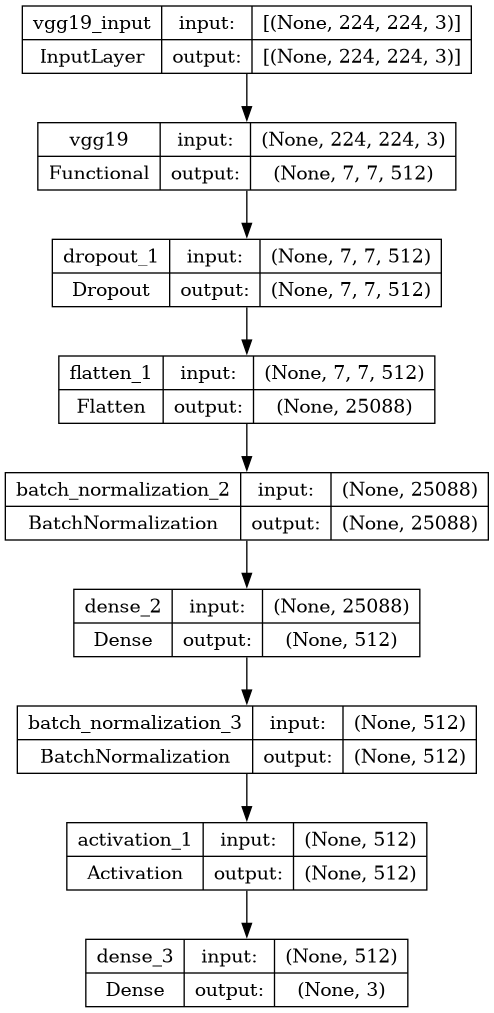

In [18]:
plot_model(model_one, to_file = 'model_one_plot.png', show_shapes = True, show_layer_names = True)

In [19]:
model_one.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['Accuracy'])

In [20]:
history_one = model_one.fit(x_train, y_train, epochs = 30, validation_split = 0.2)

Epoch 1/30


2024-03-03 07:14:02.938420: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


152/152 [==============================] - 138s 766ms/step - loss: 1.2012 - Accuracy: 0.4996 - val_loss: 7880.0801 - val_Accuracy: 0.4069
Epoch 2/30
152/152 [==============================] - 104s 682ms/step - loss: 0.8463 - Accuracy: 0.6331 - val_loss: 3332.2402 - val_Accuracy: 0.5371
Epoch 3/30
152/152 [==============================] - 103s 679ms/step - loss: 0.7561 - Accuracy: 0.6777 - val_loss: 0.9627 - val_Accuracy: 0.5511
Epoch 4/30
152/152 [==============================] - 103s 677ms/step - loss: 0.6897 - Accuracy: 0.7077 - val_loss: 919.1686 - val_Accuracy: 0.6623
Epoch 5/30
152/152 [==============================] - 102s 670ms/step - loss: 0.6401 - Accuracy: 0.7315 - val_loss: 25.7855 - val_Accuracy: 0.5255
Epoch 6/30
152/152 [==============================] - 101s 667ms/step - loss: 0.5839 - Accuracy: 0.7630 - val_loss: 10566.9453 - val_Accuracy: 0.6153
Epoch 7/30
152/152 [==============================] - 101s 666ms/step - loss: 0.4657 - Accuracy: 0.8139 - val_loss: 39528.

In [21]:
model_one.evaluate(x_test, y_test, batch_size = 100)

7/7 [==============================] - 26s 2s/step - loss: 0.2575 - Accuracy: 0.9080


[0.2574620246887207, 0.9080118536949158]

In [22]:
# InceptionV3 Neural Network
inceptionv3_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [23]:
model_two = Sequential()
model_two.add(inceptionv3_model)
model_two.add(GlobalAveragePooling2D())
model_two.add(Dropout(0.5))
model_two.add(Dense(3, activation = 'softmax'))

In [24]:
model_two.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 21808931 (83.19 MB)
Trainable params: 21774499 (83.06 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


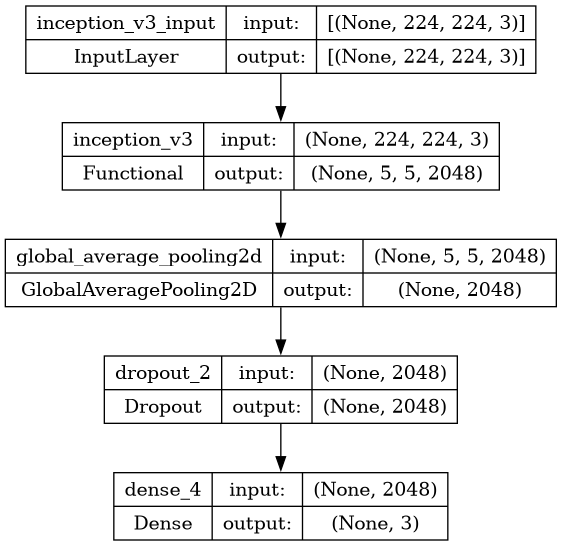

In [25]:
plot_model(model_two, to_file = 'model_two_plot.png', show_shapes = True, show_layer_names = True)

In [26]:
model_two.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [27]:
history_two = model_two.fit(x_train, y_train, epochs = 20, validation_split = 0.1)

Epoch 1/20
171/171 [==============================] - 88s 287ms/step - loss: 0.2775 - accuracy: 0.9057 - val_loss: 2.8546 - val_accuracy: 0.5173
Epoch 2/20
171/171 [==============================] - 41s 238ms/step - loss: 0.0876 - accuracy: 0.9725 - val_loss: 1.7587 - val_accuracy: 0.7941
Epoch 3/20
171/171 [==============================] - 41s 240ms/step - loss: 0.0634 - accuracy: 0.9826 - val_loss: 0.4835 - val_accuracy: 0.8072
Epoch 4/20
171/171 [==============================] - 41s 239ms/step - loss: 0.0840 - accuracy: 0.9766 - val_loss: 0.1613 - val_accuracy: 0.9341
Epoch 5/20
171/171 [==============================] - 41s 239ms/step - loss: 0.0401 - accuracy: 0.9897 - val_loss: 0.5946 - val_accuracy: 0.8353
Epoch 6/20
171/171 [==============================] - 41s 239ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 7/20
171/171 [==============================] - 41s 240ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 4.2054e-04 - va

In [28]:
model_two.evaluate(x_test, y_test, batch_size = 100)

7/7 [==============================] - 8s 714ms/step - loss: 7.3344e-04 - accuracy: 1.0000


[0.0007334448746405542, 1.0]

In [29]:
# DenseNet169 Neural Network
dense_net = DenseNet169(include_top = False, weights = 'imagenet', input_shape = (224,224,3))

51877672/51877672 [==============================] - 0s 0us/step


In [30]:
model_three = Sequential()

model_three.add(dense_net)

model_three.add(Flatten())
model_three.add(BatchNormalization())
model_three.add(Dense(256, kernel_initializer = 'he_uniform'))
model_three.add(BatchNormalization())
model_three.add(Activation('relu'))
model_three.add(Dropout(0.5))
model_three.add(Dense(3, activation = 'sigmoid'))

In [31]:
model_three.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 flatten_2 (Flatten)         (None, 81536)             0         
                                                                 
 batch_normalization_98 (Ba  (None, 81536)             326144    
 tchNormalization)                                               
                                                                 
 dense_5 (Dense)             (None, 256)               20873472  
                                                                 
 batch_normalization_99 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 activation_96 (Activation)  (None, 256)              

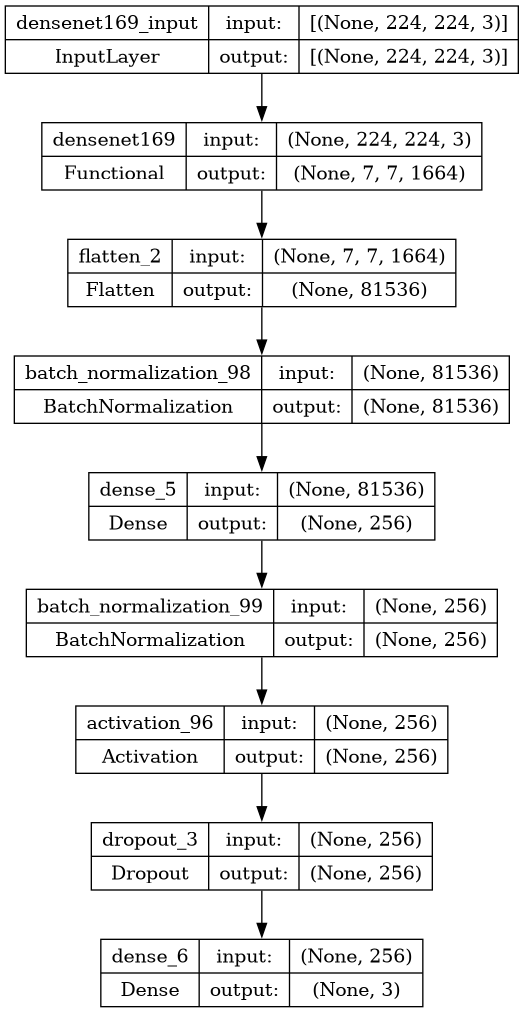

In [32]:
plot_model(model_three, to_file = 'model_three_plot.png', show_shapes = True, show_layer_names = True)

In [33]:
model_three.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['Accuracy']) 

In [34]:
history_three = model_three.fit(x_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
152/152 [==============================] - 179s 533ms/step - loss: 0.2630 - Accuracy: 0.9161 - val_loss: 0.6520 - val_Accuracy: 0.8542
Epoch 2/10
152/152 [==============================] - 68s 448ms/step - loss: 0.1377 - Accuracy: 0.9567 - val_loss: 0.2595 - val_Accuracy: 0.9399
Epoch 3/10
152/152 [==============================] - 68s 446ms/step - loss: 0.0209 - Accuracy: 0.9944 - val_loss: 0.0147 - val_Accuracy: 0.9975
Epoch 4/10
152/152 [==============================] - 68s 447ms/step - loss: 0.0653 - Accuracy: 0.9767 - val_loss: 1.6515 - val_Accuracy: 0.7257
Epoch 5/10
152/152 [==============================] - 68s 446ms/step - loss: 0.0439 - Accuracy: 0.9868 - val_loss: 0.0125 - val_Accuracy: 0.9967
Epoch 6/10
152/152 [==============================] - 68s 446ms/step - loss: 0.0287 - Accuracy: 0.9924 - val_loss: 0.2440 - val_Accuracy: 0.9094
Epoch 7/10
152/152 [==============================] - 68s 446ms/step - loss: 0.0261 - Accuracy: 0.9909 - val_loss: 0.0034 - val_A

In [35]:
model_three.evaluate(x_test, y_test, batch_size = 100)

7/7 [==============================] - 13s 1s/step - loss: 0.2463 - Accuracy: 0.9258


[0.2462669163942337, 0.925815999507904]

In [36]:
# MobileNet Neural Network
mobile = MobileNet(weights = 'imagenet', include_top = False, input_shape = (224,224,3))

17225924/17225924 [==============================] - 0s 0us/step


In [37]:
model_four = Sequential()

model_four.add(mobile)
model_four.add(GlobalAveragePooling2D())
model_four.add(Dense(1024, activation = 'relu'))
model_four.add(Dense(1024, activation = 'relu'))
model_four.add(Dense(512, activation = 'relu'))
model_four.add(Dense(3, activation = 'softmax'))

In [38]:
model_four.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_7 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_8 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dense_10 (Dense)            (None, 3)                

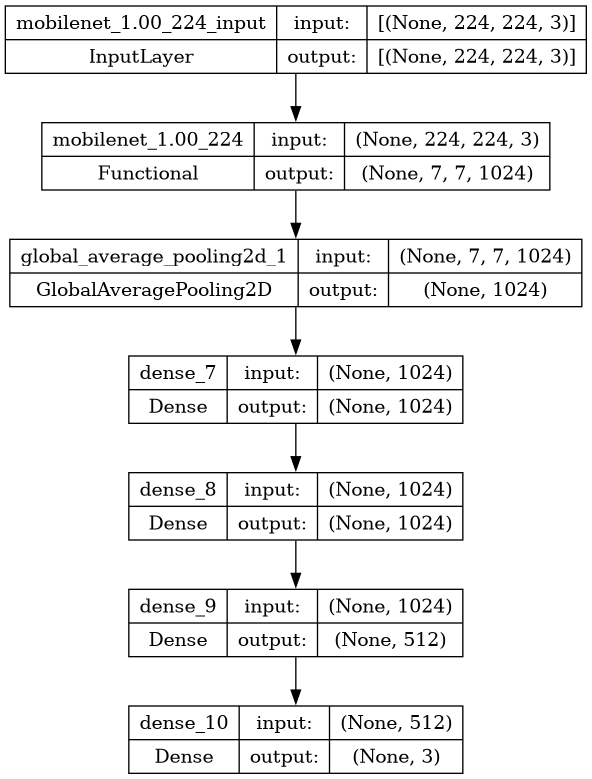

In [39]:
plot_model(model_four, to_file = 'model_four_plot.png', show_shapes = True, show_layer_names = True)

In [40]:
model_four.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['Accuracy']) 

In [41]:
history_four = model_four.fit(x_train, y_train, epochs = 10,validation_split = 0.2)

Epoch 1/10
152/152 [==============================] - 36s 133ms/step - loss: 0.2022 - Accuracy: 0.9316 - val_loss: 1.1053 - val_Accuracy: 0.8114
Epoch 2/10
152/152 [==============================] - 19s 122ms/step - loss: 0.1049 - Accuracy: 0.9722 - val_loss: 0.7257 - val_Accuracy: 0.8484
Epoch 3/10
152/152 [==============================] - 18s 120ms/step - loss: 0.0571 - Accuracy: 0.9847 - val_loss: 0.0328 - val_Accuracy: 0.9934
Epoch 4/10
152/152 [==============================] - 18s 119ms/step - loss: 0.0386 - Accuracy: 0.9899 - val_loss: 0.2250 - val_Accuracy: 0.9671
Epoch 5/10
152/152 [==============================] - 18s 119ms/step - loss: 0.0610 - Accuracy: 0.9825 - val_loss: 0.5878 - val_Accuracy: 0.8904
Epoch 6/10
152/152 [==============================] - 18s 119ms/step - loss: 0.0402 - Accuracy: 0.9895 - val_loss: 0.0533 - val_Accuracy: 0.9819
Epoch 7/10
152/152 [==============================] - 18s 120ms/step - loss: 0.0474 - Accuracy: 0.9870 - val_loss: 0.3515 - val_Ac

In [42]:
model_four.evaluate(x_test, y_test, batch_size = 100)

7/7 [==============================] - 2s 197ms/step - loss: 0.1249 - Accuracy: 0.9911


[0.12489298731088638, 0.9910979270935059]

In [43]:
# Code for Protozoan Parasite Detection
img_open = Image.open('/kaggle/input/protozoan-parasite-image-dataset-augmented/Train/Giardia cyst/GI1.png_0_168.png')
size = (224, 224)
img_rgb = img_open.convert('RGB')
img = ImageOps.fit(img_rgb, size, Image.Resampling.LANCZOS)
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [44]:
img_array_reshape = img_array.reshape(1, 224, 224, 3)
img_array_reshape.shape

(1, 224, 224, 3)

In [45]:
# VGG19
a = model_one.predict(img_array_reshape) 
indices = a.argmax()
print(a)

1/1 [==============================] - 1s 848ms/step
[[2.8433827e-01 7.1560252e-01 5.9290003e-05]]


In [46]:
acc = np.amax(a) * 100
acc = round(acc, 3)
print(acc)

71.56


In [47]:
if(indices == 0):
    print("Cryptosporidium cyst")
elif(indices == 1):
    print("Entamoeba histolytica")
else:
    print("Giardia cyst")

Entamoeba histolytica


In [48]:
# InceptionV3
b = model_two.predict(img_array_reshape) 
indices = b.argmax()
print(b)

1/1 [==============================] - 2s 2s/step
[[7.2743994e-08 1.3501064e-07 9.9999976e-01]]


In [49]:
acc = np.amax(b) * 100
acc = round(acc, 3)
print(acc)

100.0


In [50]:
if(indices == 0):
    print("Cryptosporidium cyst")
elif(indices == 1):
    print("Entamoeba histolytica")
else:
    print("Giardia cyst")

Giardia cyst


In [51]:
# DenseNet169
c = model_three.predict(img_array_reshape) 
indices = c.argmax()
print(c)

1/1 [==============================] - 4s 4s/step
[[0.00887076 0.0483873  0.99793434]]


In [52]:
acc = np.amax(c) * 100
acc = round(acc, 3)
print(acc)

99.793


In [53]:
if(indices == 0):
    print("Cryptosporidium cyst")
elif(indices == 1):
    print("Entamoeba histolytica")
else:
    print("Giardia cyst")

Giardia cyst


In [54]:
# MobileNet
d = model_four.predict(img_array_reshape) 
indices = d.argmax()
print(d)

1/1 [==============================] - 1s 620ms/step
[[3.9975457e-03 3.5035922e-04 9.9565214e-01]]


In [55]:
acc = np.amax(d) * 100
acc = round(acc, 3)
print(acc)

99.565


In [56]:
if(indices == 0):
    print("Cryptosporidium cyst")
elif(indices == 1):
    print("Entamoeba histolytica")
else:
    print("Giardia cyst")

Giardia cyst


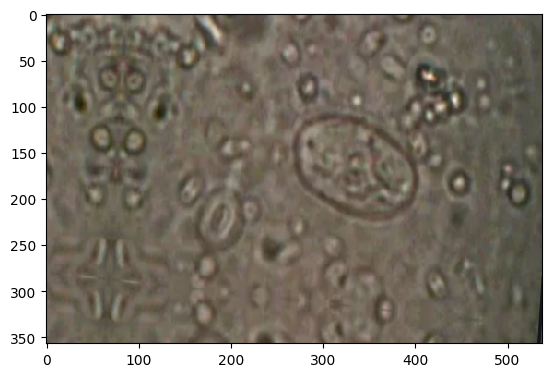

In [57]:
full_img = image.load_img('/kaggle/input/protozoan-parasite-image-dataset-augmented/Train/Giardia cyst/GI1.png_0_168.png')
plt.imshow(full_img,interpolation='nearest')
plt.show()

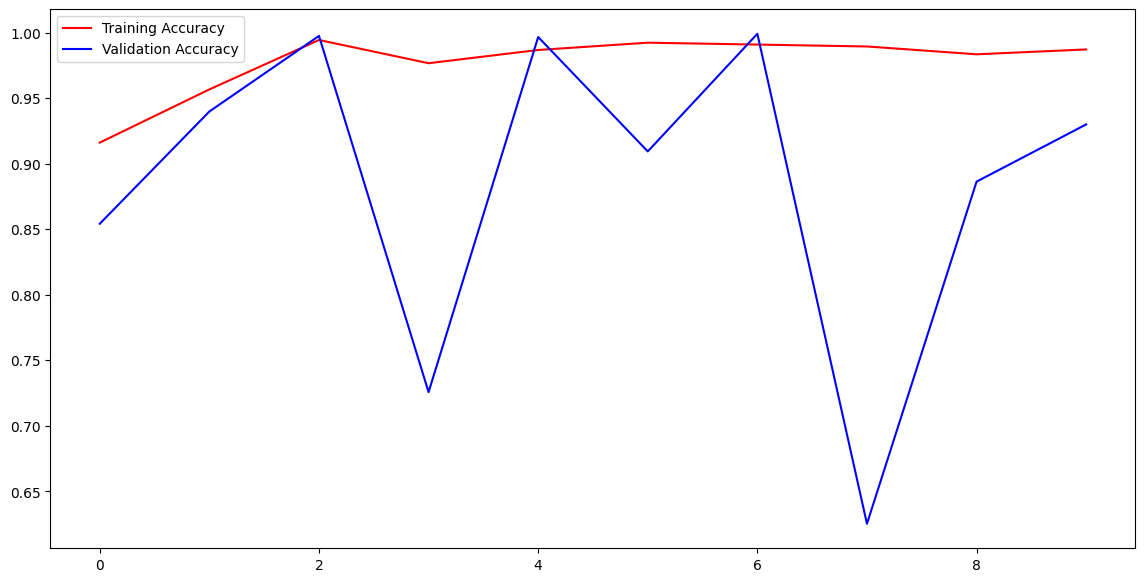

In [58]:
# Accuracy and Loss graph of DenseNet169 (Best neural network model)
acc = history_three.history['Accuracy'] 
val_acc = history_three.history['val_Accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.legend(loc = 'upper left')
plt.show()

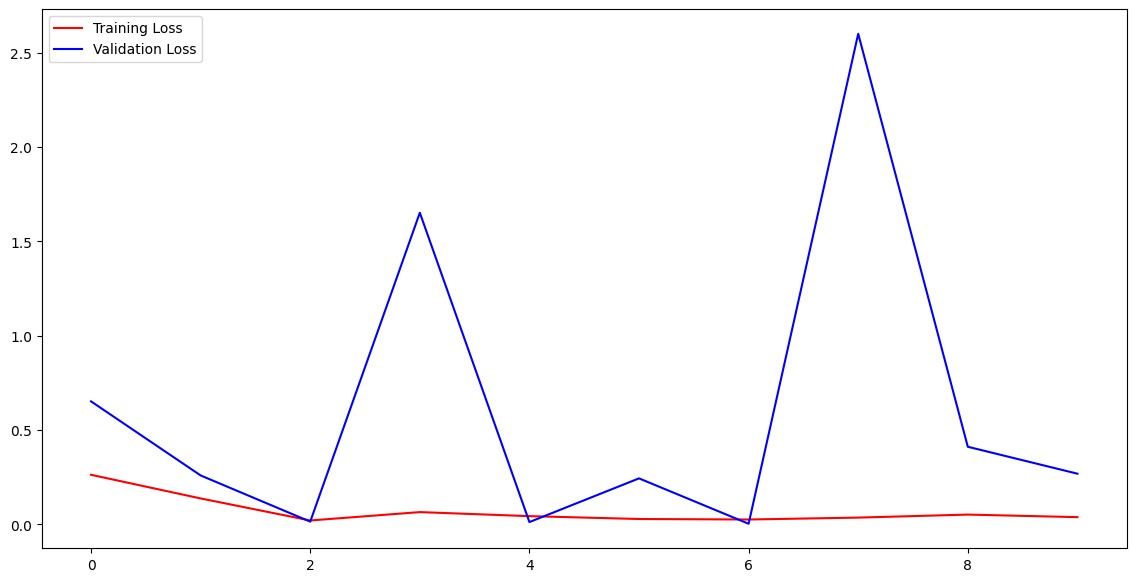

In [59]:
loss = history_three.history['loss']
val_loss = history_three.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.legend(loc = 'upper left')
plt.show()

In [60]:
# Model Saving
model_one.save('VGG19_model.h5')
model_two.save('InceptionV3_model.h5')
model_three.save('DenseNet169_model.h5')
model_four.save('MobileNet_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
